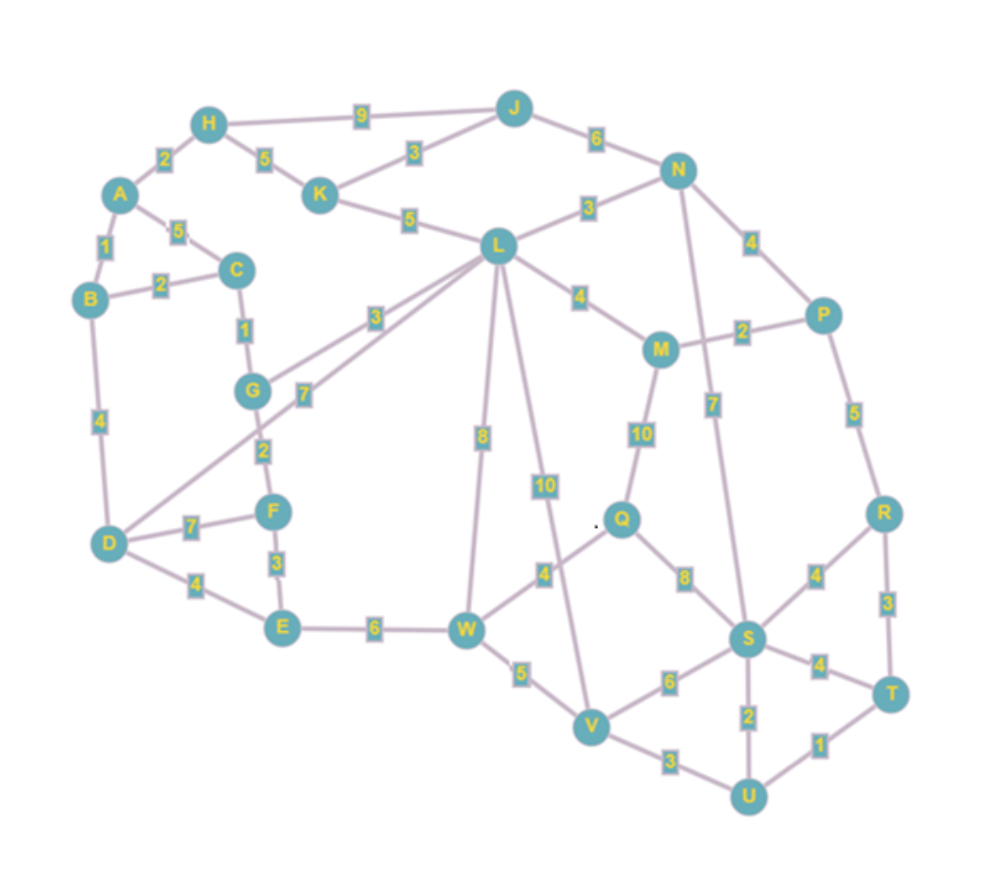

# Questions 1
A puzzle has multiple ways of reaching the end solution. Fig. 1 shows a graph that represents all possible routes to the solution. The starting point of the game is represented by A, the solution is represented by S. The other points in the graph are possible intermediary stages.

In [1]:
import heapq

In [2]:
# Node and edge weights on the graph.
graph = {
    'A': {'B': 1, 'C': 5, 'H': 2},
    'B': {'A': 1, 'C': 2, 'D': 4},
    'C': {'A': 5, 'B': 2, 'G': 1},
    'D': {'B': 4, 'E': 4, 'F': 7, 'L': 7},
    'E': {'D': 4, 'F': 3, 'W': 6},
    'F': {'D': 7, 'E': 3, 'G': 2},
    'G': {'C': 1, 'F': 2, 'L': 3},
    'H': {'A': 2, 'J': 9, 'K': 5},
    'J': {'H': 9, 'K': 3, 'N': 6},
    'K': {'H': 5, 'J': 3, 'L': 5},
    'L': {'D': 7, 'G': 3, 'K': 5, 'M': 4, 'N': 3, 'V': 10, 'W': 8},
    'M': {'L': 4, 'P': 2, 'Q': 10},
    'N': {'J': 6, 'L': 3, 'P': 4, 'S': 7},
    'P': {'M': 2, 'N': 4, 'R': 5},
    'Q': {'M': 10, 'S': 8, 'W': 4},
    'R': {'P': 5, 'S': 4, 'T': 3},
    'S': {'N': 7, 'Q': 8, 'R': 4, 'T': 4, 'U': 2, 'V': 6},
    'T': {'R': 3, 'S': 4, 'U': 1},
    'U': {'S': 2, 'T': 1, 'V': 3},
    'V': {'L': 10, 'S': 6, 'W': 5, 'U': 3},
    'W': {'E': 6, 'L': 8, 'Q': 4, 'V': 5},
}

In [3]:
# This function is used to find all paths from the start point to the end point.
def find_paths(graph, start, end, path=[]):
    path = path + [start]
    if start == end:
        return [path]
    if start not in graph:
        return[]
# Initialize an empty list to store all possible paths.
    paths = []
# Traverse all neighbor nodes strarting from the starting node.
    for node in graph[start]:
        if node not in path:
            newpaths = find_paths(graph, node, end, path)
            for newpath in newpaths:
                paths.append(newpath)
# Return all path found.
    return paths

In [4]:
# Find all paths from A to S.
all_paths = find_paths(graph, 'A', 'S')

In [5]:
# This line of code tells us how many paths there are in total.
number_of_paths = len(all_paths)

In [6]:
# Convert the reading format, I think this can read more cleary.
paths_list = [" -> ".join(path) for path in all_paths]

In [7]:
# The number of paths is 2380. here we can adjust the number of paths by ourselves in [: ]
number_of_paths, paths_list[:5]

(2380,
 ['A -> B -> C -> G -> F -> D -> E -> W -> L -> K -> H -> J -> N -> P -> M -> Q -> S',
  'A -> B -> C -> G -> F -> D -> E -> W -> L -> K -> H -> J -> N -> P -> R -> S',
  'A -> B -> C -> G -> F -> D -> E -> W -> L -> K -> H -> J -> N -> P -> R -> T -> S',
  'A -> B -> C -> G -> F -> D -> E -> W -> L -> K -> H -> J -> N -> P -> R -> T -> U -> S',
  'A -> B -> C -> G -> F -> D -> E -> W -> L -> K -> H -> J -> N -> P -> R -> T -> U -> V -> S'])

# Questions
## (a) The graph in Fig. 1 is a visualisation of the problem.

###  (i) Identify the differences between a graph and a tree.
    In a tree, the relationship between any two points is unique, directional, and without loops. It is as special as having rules. But there may be loops in the graph, and you can even reach the destination starting from any point. In comparison, graph seems very free. Although tree is also a type of graph, their difference is that tree cannot heve reconvergence, but graph can. Therefore, for a graph without reconvergence, we can still treat it as a graph, but we usually treat is as a tree to view it difference.

### (ii) Explain in detail how the graph is an abstraction of the problem.

    Imagine this as a map of a Lego city where a friend tries to piece together a giant Lego metropolis. Now he wants to find the best way to connect all his Lego buildings, but Lego bricks are limited and he needs to use them most efficiently. Buildings are represented by each letter, while lines are the paths that may connect the buildings. The number on the line represents the number of Lego bricks required to build the road. The higher the number required, the higher the cost. And some require less.
    
    By abstracting the problem into a graph like this, we can determine the best way to connect all buildings with the least number of connections, so that we can plan a building that saves Lego blocks and makes it easy for everyone to walk anywhere in the city. A path to a place. In other words, graph can help us sort out the most efficient solution.

### (iii) Identify the advantages of using a visualisation such as the one shown in Fig.

    As explained above, imagine a Lego city is a complex maze. It is necessary to ensure that all buildings are connected. So we need to figure out which streets should be built without wasting any Lego blocks. This fig is like a blueprint. The advantage of having this fig is like having a city planner's perspective.
    It is convenient for us to see the whole picture, just like a person standing on top of a city model, we can see which buildings are clise and far away, and we can see at a glance which route saves the most Lego blocks.
    
    However, without fig, the error rate may be higher, which may lead to people connecting buildings blindly. As a result, too many Lego blocks may be wasted in some places, or some buildings mey be missed. But with fig, you can better plan on paper first and then build it, just like drawing a sketch first and then drawing details. In other words, through this fig we can clearly know how to use each Lego block, which helps us become efficient Lego city planners to ensure that everyone in the city can reach any place through the best route. This is the advantage of this kind of visualization tool, maybe complex problems can become simple and easy to understand.

## (b) Demonstrate how Dijkstra’s algorithm would find the shortest path to the solution in Fig.1 through diagrams and written explanation of each stage.

In [8]:
# Dijkstra's algorithm finds the shortest path from start point to end point.
def dijkstra(graph, start, goal):
    queue = [(0, start, [])]  # Priority queue for tracking nodes to visit.
    visited = set()
    shortest_paths = {start: (None, 0)}
    # Dictionary for tracking the shortest path to a node found so far.
    
    while queue:
        # Get the node in the queue with the smallest distance.
        current_distance, current_node, path = heapq.heappop(queue)
        # Finalize the path if the node has not been visited.
        if current_node not in visited:
            visited.add(current_node)
            path = path + [current_node]
            # If the goal node is found, return the path and its distance.
            if current_node == goal:
                return (current_distance, path)
            
            # Get all adjacent nodes, calculate the distance to each, and add them to the queue.
            for neighbor, weight in graph.get(current_node, {}).items():
                if neighbor not in visited:
                    new_distance = current_distance + weight
                    if new_distance < shortest_paths.get(neighbor, (None, float('inf')))[1]:
                        # Update the shortest path to this node.
                        shortest_paths[neighbor] = (current_node, new_distance)
                        heapq.heappush(queue, (new_distance, neighbor, path))
                        
    return float('inf'), []

In [9]:
def find_shortest_path_with_distance(graph, start, end):
    distance, path = dijkstra(graph, start, end)
    return distance, path

# Using the function to find the shortest path from 'A' to 'S'.
shortest_path_and_distance = find_shortest_path_with_distance(graph, 'A', 'S')
shortest_path_and_distance

(17, ['A', 'B', 'C', 'G', 'L', 'N', 'S'])

# Questions 2
    The creator of the puzzle has been told that the A* algorithm is more efficient at finding the shortest path because it uses heuristics. Compare the performance of Dijkstra’s algorithm and the A* search algorithm, referring to heuristics, to find the shortest path to the problem by implementing both algorithms programmatically and comparing the solutions generated in Mark-down. Refer to the complexity of the algorithms and compare the actual time it takes for the solutions to be processed.

In [10]:
# A* algorithm finds the shortest path from start point to end point.
def astar(graph, start, goal, h):
    open_set = {start}  # Create an open list to store nodes that have been discovered but not yet checked.
    closed_set = set()  # Create a closure list and store the checked nodes.
    came_from = {}      # Create a dictionary to store the parent node of each node.
    
    gpath = {node: float('inf') for node in graph} # The distance of the minimum path from the starting point to a node.
    gpath[start] = 0
    
    fpath = {node: float('inf') for node in graph} # Total distance estimate from origin to target.
    fpath[start] = h(start)
        
    while open_set:
        current = min(open_set, key=lambda node: fpath[node])   # Select the node with the smallest fpath to search.
        if current == goal:
            path = []
            while current in came_from:
                current = came_from[current]
                path.append(current)
            path.append(start)
            return gpath[goal], path[::-1]  # Trace backward from the target node to reconstruct the entire path.
        
        open_set.remove(current)
        closed_set.add(current)

        for neighbor, weight in graph[current].items():
            if neighbor in closed_set:
                continue # Ignore evaluated neighbors.
                
            # distance from current node to neighbor.
            n_gpath = gpath[current] + weight    
            if n_gpath < gpath[neighbor]:
                came_from[neighbor] = current
                gpath[neighbor] = n_gpath
                fpath[neighbor] = n_gpath + h(neighbor)
            if neighbor not in open_set:
                open_set.add(neighbor)

    return float('inf'), [] 

In [11]:
# Heuristic function for A* algorithm.
def h(node):
    return 1

In [12]:
# Using the function to find the shortest path from 'A' to 'S'.
path_astar, distance_astar = astar(graph, 'A', 'S', h)
path_astar, distance_astar

(17, ['A', 'A', 'B', 'C', 'G', 'L', 'N'])